In [2]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 10.3 MB/s eta 0:00:00


In [3]:
!pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
import keras_tuner
from tabulate import tabulate

In [6]:
df = pd.read_csv(".../CarPrice_Assignment.csv")
# Display basic statistics of the dataset
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.select_dtypes(include="object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


## Remove duplicate rows from the dataset

In [ ]:
df = df.drop_duplicates()

## Visualize the histogram of car prices

Text(0.5, 1.0, 'Car Price Histogram')

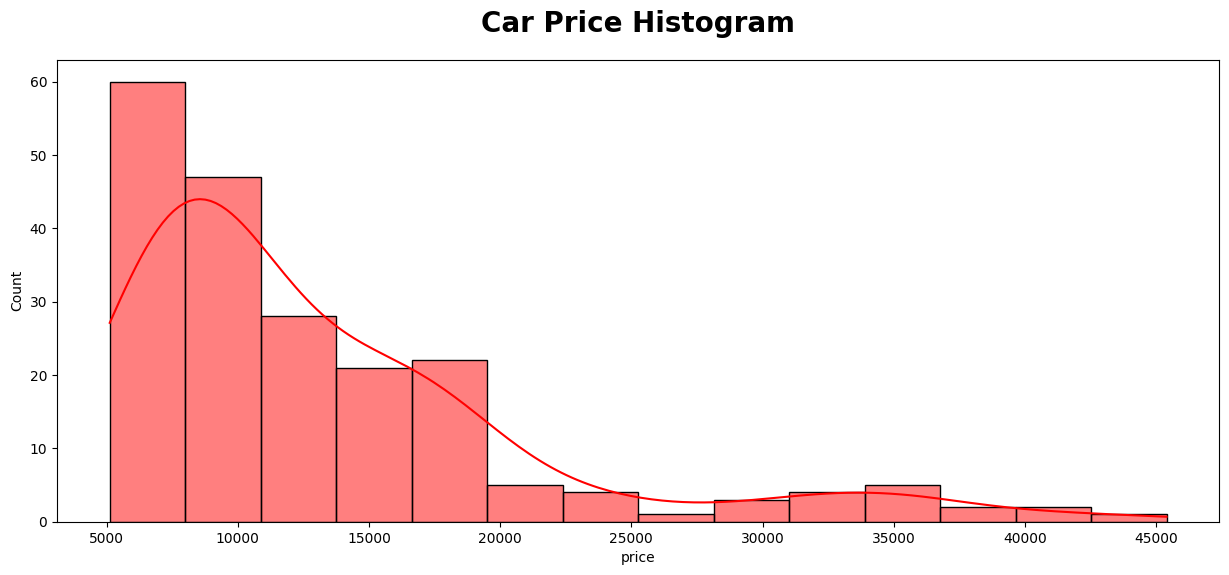

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df["price"],color="red",kde=True)
plt.title("Car Price Histogram",fontweight="black",pad=20,fontsize=20)

## Visualize the distribution of car fuel types

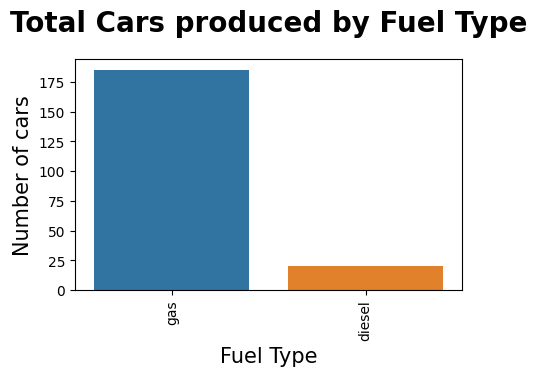

In [ ]:
plt.figure(figsize=(5,3))
counts = df["fueltype"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Fuel Type",fontsize=15)
plt.ylabel("Number of cars",fontsize=15)
plt.title("Total Cars produced by Fuel Type", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Group data by engine type and visualize the mean price for each engine type

<ipython-input-11-d9904f3190e8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby_engineType = df.groupby(["enginetype"]).mean()


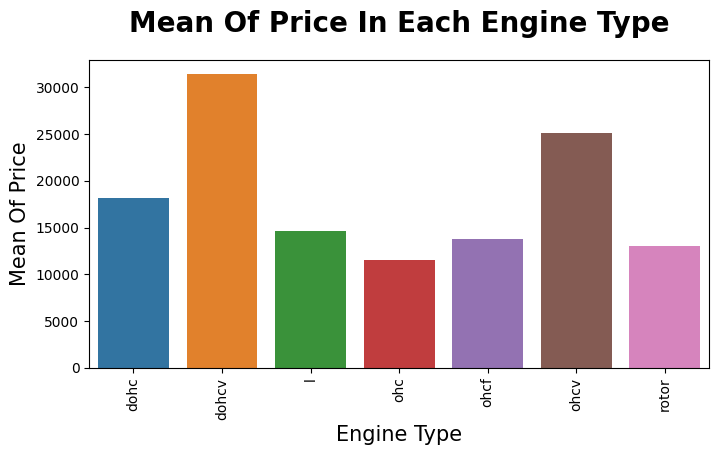

In [ ]:
df_groupby_engineType = df.groupby(["enginetype"]).mean()
plt.figure(figsize=(8,4))
price_mean = df_groupby_engineType.price
sns.barplot(x=df_groupby_engineType.index, y=price_mean)
plt.xlabel("Engine Type",fontsize=15)
plt.ylabel("Mean Of Price",fontsize=15)
plt.title("Mean Of Price In Each Engine Type", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Calculate and visualize the correlation matrix between numerical variables

<ipython-input-12-0f88bf0e9092>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


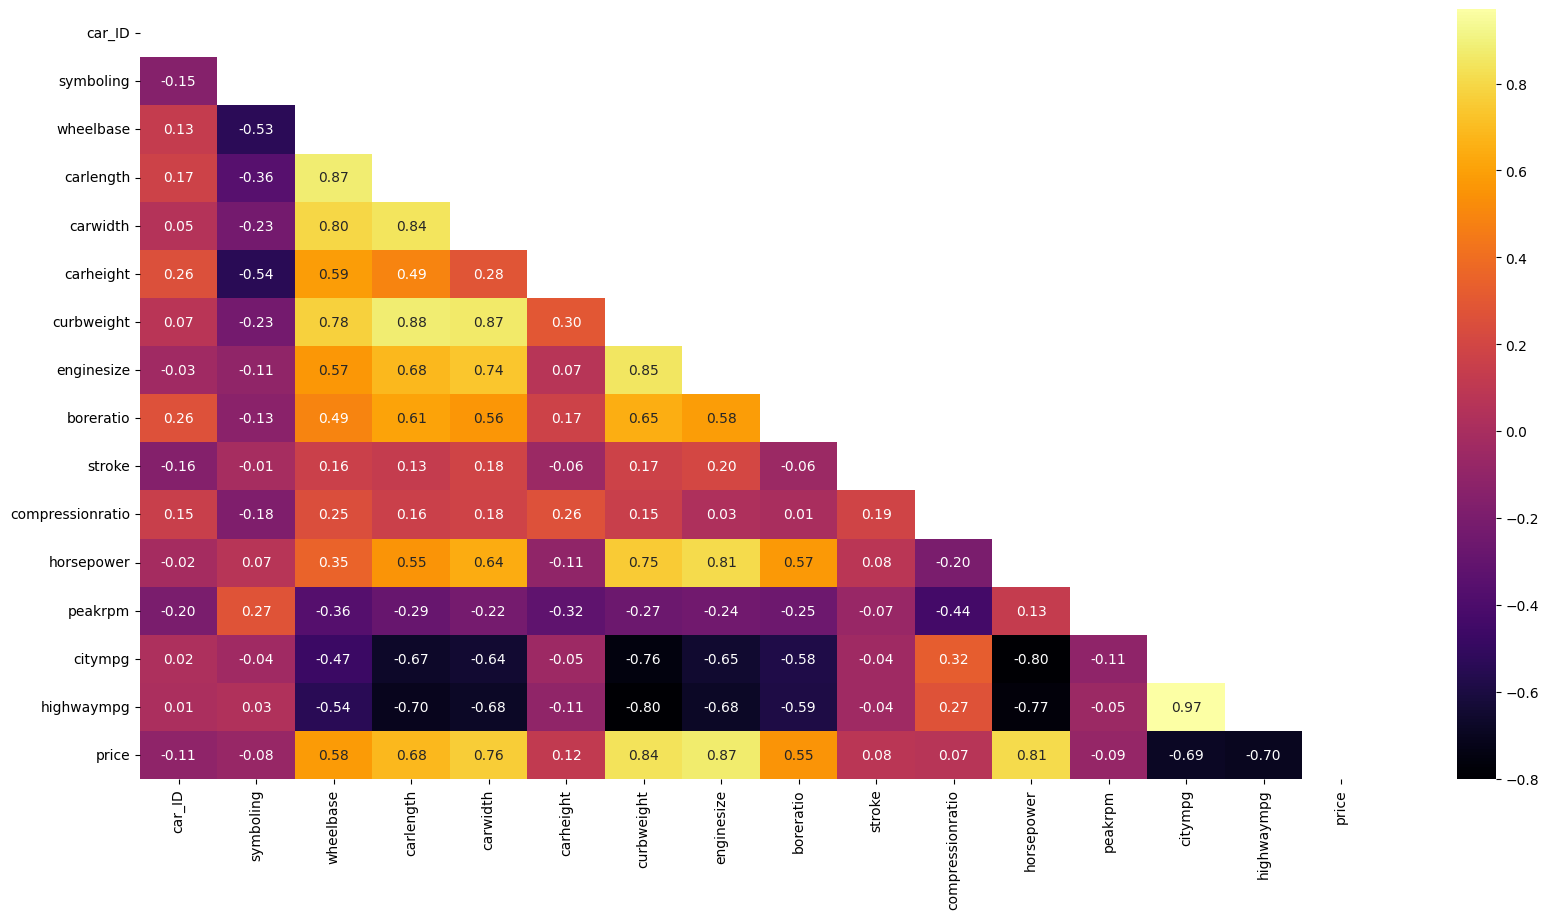

In [ ]:
corr= df.corr()
matrix = np.triu(corr)
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True, mask=matrix, fmt = ".2f", cmap = 'inferno');

## Display the number of unique values for each column

In [ ]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

# Drop specific columns(features) from the dataset

In [7]:
df = df.drop(["symboling","compressionratio","car_ID","stroke"],axis=1)

## Replace specific values in the "fuelsystem" column

In [8]:
df["fuelsystem"] =  df["fuelsystem"].replace(['mpfi', 'mfi'], "fi")
df["fuelsystem"] =  df["fuelsystem"].replace(['1bbl', '2bbl','4bbl'], "bbl")
df["fuelsystem"] =  df["fuelsystem"].replace(['spdi', 'idi','4bbl'], "spfi")